In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
dfd=pd.read_csv("../../KavliSP23/Python/input_data/donor_composition.csv")
dfr=pd.read_csv("../../KavliSP23/Python/input_data/remnant_composition.csv")

In [46]:
dfd['xn_ni56,'] = 0.0e0


In [47]:
columns_to_plot = [  'xn_p,', 'xn_he4,', 'xn_c12,', 'xn_o16,', 'xn_ne20,', 'xn_si28,', 'xn_ni56,']

/home/bhat/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


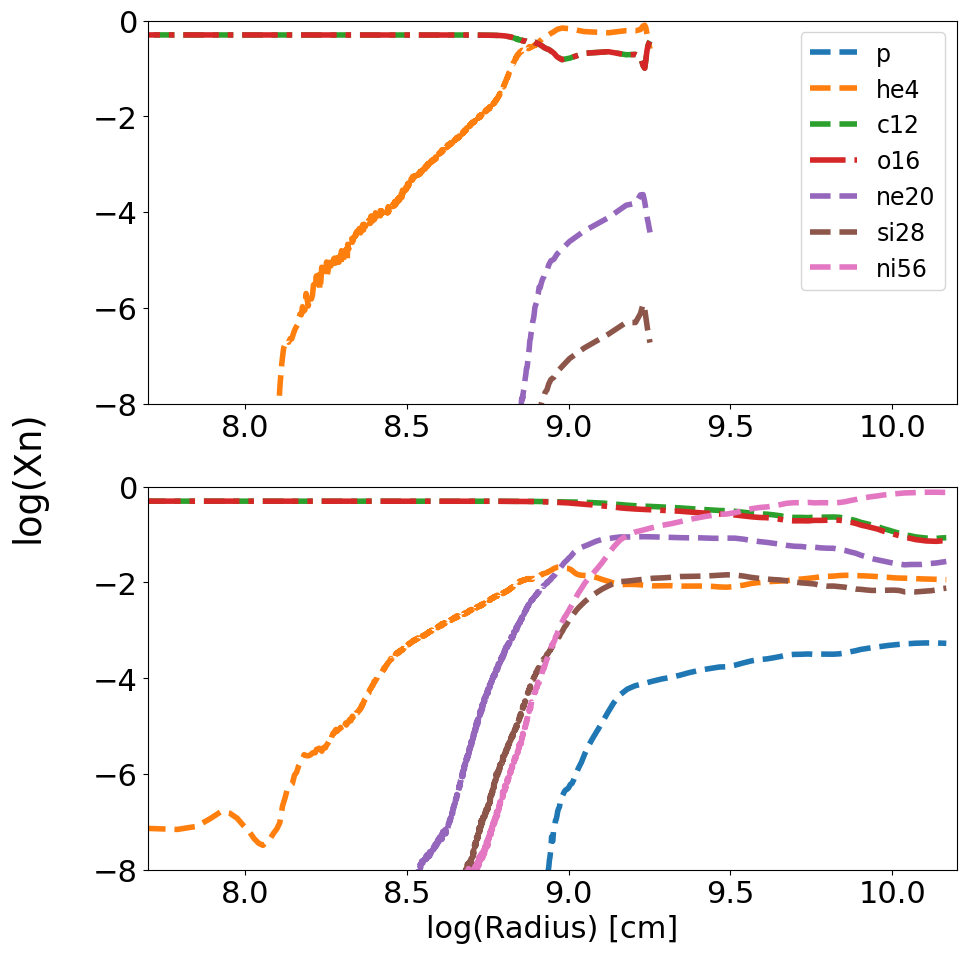

In [52]:

num_columns = len(dfd[columns_to_plot].columns[:-1])  # Exclude the X-axis column
#print(num_columns)
plt.rcParams["font.size"]=22
plt.rcParams["legend.fontsize"]=11
plt.rcParams['lines.linestyle']="--"
plt.rcParams['lines.linewidth']=4
fig,ax=plt.subplots(2,1,figsize=(10,10))
for i, column in enumerate(dfd[columns_to_plot].columns[:]):
    if max(dfr[column])>1.0e-6 :
        if column=="xn_o16,":
            plt.rcParams['lines.linestyle']="-."
        else: plt.rcParams['lines.linestyle']="--"


        ax[0].plot(np.log10(dfd["r_outer,"]), np.log10(dfd[column]), label=column[3:-1])
        ax[1].plot(np.log10(dfr["r_outer,"]), np.log10(dfr[column]), label=column)

    
plt.xlabel("log(Radius) [cm]")
fig.supylabel("log(Xn)")
#ax[0].legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
ax[0].legend(loc='best',fontsize=17)#, bbox_to_anchor=(1, 0.5))

ax[0].set_ylim(-8,0)
ax[1].set_ylim(-8,0)
ax[0].set_xlim(7.7,10.2)
ax[1].set_xlim(7.7,10.2)

plt.xlim()
plt.tight_layout()
plt.savefig('../Plots/plots_paper/comparison_composition.pdf')
plt.savefig('../Plots/plots_paper/comparison_composition.png')
